Team Name: Cain and Tim 
<br> 
Number of Kaggle Submissions: 33
<br>
Best Score on Public leaderboard: 0.94066
<br>
Word Count: 3000

# 1. Business Understanding

## 1.1 Determine Business Objectives

As budget cuts increase, the number of resources that the police can assign to crimes decreases. This provides a real danger as offenders could be less likely to be caught which could lead to an increase in crime as criminal behaviour goes unpunished. The police want a way to help them identify the gender of an offender to narrow down the search, helping them catch the offender faster and with less resources. They want this done through the process of developing a model based off of landmarks around a footprint.
<br><br>
This study has been determined to have the following business objectives:     
- Identify the gender of an individual

This study will be a business success if:    
- We discover an effective way of identifying footprints
<br>


## 1.2 Assess Situation

The police have employed us to carry out this study on the data points around the foot. An automated model would be better than none for this task as a footprint is hard for the human brain to try to identify the gender on its own as there are so many different factors that could come into play. Also, not everyone is the same, so it is hard to manually categorize a footprint into male or female.

**Data.** The data we have been provided is 2000 instances of footprints including their gender. There are 598 instances from which our models will need to determine the gender.

**Risks and Contingencies.** A risk is that the data is not descriptive enough to help determine the gender or missing data could interfere with the accuracy of the models we end up creating. To mitigate these risks, we will process the data to try to provide extra features that we can use to aid us in determining the gender. We will also look at ways of filling in missing data points to increase the accuracy of the model that we create.

**Costs and Benefits.** The success of this study will be a major help for the police and can potentially reduce the future crime rate if the model we end up creating is implemented. There are not many costs for this study as it is a student assignment and therefore does not require funding. The only major cost is time as it will need to be completed within 2 months as that is the due date and the length of the assignment.


## 1.3 Determine Data Mining Goals

The data mining goals of this study are:

- Use the data that has been given to us and apply predictive modelling techniques in order to determine if the gender of the footprint is male or female (0 or 1).
- Extract more data from the points we are given in order to see if the new data that we generate can be useful in the prediction of footprint gender.
- Gender is identified successfully 80%+ of the time.
apply a wide range of data mining techniques while comparing them in order to develop an accurate model.

The data mining success criteria is:
- The accuracy of models increase as we progress.
- The model we end up producing useful in identifying gender.


# 2. Data Understanding

## 2.1 Collect Initial Data

In [ ]:
# put Kaggle API credentials inside the docker container
!mkdir -p /root/.kaggle
!echo '{"username":"timbamber","key":"b39cb0f4f7391f129b77197bb73c7a88"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Unzip the data downloaded
!kaggle competitions download -c budm21 --force
!unzip -o *.zip

  0% 0.00/3.99k [00:00<?, ?B/s]
100% 3.99k/3.99k [00:00<00:00, 6.91MB/s]
  0% 0.00/403k [00:00<?, ?B/s]
100% 403k/403k [00:00<00:00, 55.3MB/s]
  0% 0.00/537k [00:00<?, ?B/s]
100% 537k/537k [00:00<00:00, 17.0MB/s]
Archive:  GenderLandmarks-train.csv.zip
  inflating: GenderLandmarks-train.csv  


In [ ]:
# Imports needed
import kaggle
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics, tree, svm
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from matplotlib.legend_handler import HandlerLine2D
from numpy import mean
from numpy import std
import time

## 2.2 Describe Data 

Having downloaded and unzipped the dataset, we created a variable called 'train_df' which, using pandas, helped us set it to read the csv file.

In [ ]:
train_df = pd.read_csv('GenderLandmarks-train.csv')

We first looked at what data we had, using the describe() function, we saw there were 37 attributes. These attributes were made up of 18 normalised x and y coordinates of a footprint, and one sex column. 

In [ ]:
train_df.describe()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
count,2000.00000,2000.000000,2000.000000,1994.000000,1994.000000,1993.000000,1993.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1983.000000,1983.000000
mean,0.55850,0.487538,0.142495,0.488544,0.148220,0.488321,0.177648,0.487826,0.218273,0.486957,0.272767,0.485293,0.339229,0.483736,0.391514,0.477024,0.581950,0.475605,0.743143,0.476982,0.775661,0.475448,0.682442,0.475880,0.608140,0.478347,0.514928,0.483149,0.407749,0.483490,0.374265,0.481527,0.316086,0.482622,0.257975,0.485124,0.245457
std,0.49669,0.093121,0.059570,0.051502,0.059680,0.094597,0.059735,0.137298,0.059840,0.171293,0.061972,0.175482,0.064906,0.184741,0.068487,0.089184,0.085838,0.059292,0.099844,0.112509,0.102197,0.150311,0.093776,0.101895,0.086237,0.048361,0.076974,0.048621,0.069833,0.119457,0.066957,0.164397,0.064219,0.140620,0.060773,0.051954,0.059889
min,0.00000,0.175532,0.001002,0.220859,0.001002,0.185583,0.021830,0.159509,0.060291,0.108896,0.115385,0.108434,0.172557,0.091867,0.232848,0.151840,0.383768,0.157975,0.526286,0.160572,0.546888,0.111963,0.461924,0.161043,0.398798,0.268405,0.318637,0.272347,0.218295,0.127660,0.180361,0.029255,0.129259,0.042553,0.091182,0.279141,0.083166
25%,0.00000,0.410135,0.099982,0.456053,0.106029,0.406938,0.135271,0.363337,0.176715,0.327892,0.228754,0.321468,0.293543,0.311576,0.341693,0.403738,0.522760,0.436203,0.673583,0.383651,0.702451,0.341932,0.617649,0.387917,0.548044,0.449610,0.462477,0.456981,0.359672,0.377107,0.328315,0.331990,0.271877,0.356151,0.215530,0.451500,0.202468
50%,1.00000,0.486504,0.140632,0.488557,0.146900,0.490798,0.175112,0.521695,0.215431,0.554990,0.268298,0.557388,0.332631,0.558647,0.382448,0.477107,0.565161,0.474609,0.716671,0.474261,0.748052,0.434794,0.660890,0.472178,0.588883,0.478722,0.502227,0.483680,0.398815,0.461438,0.366944,0.420670,0.309592,0.449387,0.253770,0.484450,0.240473
75%,1.00000,0.567022,0.180361,0.520950,0.188130,0.568368,0.216843,0.611989,0.256513,0.645764,0.311850,0.649112,0.378398,0.654856,0.431608,0.551698,0.627078,0.515023,0.798747,0.574128,0.831167,0.614617,0.733651,0.564400,0.655165,0.507516,0.556430,0.510376,0.448935,0.591357,0.415155,0.635003,0.356986,0.611963,0.295962,0.520419,0.282791
max,1.00000,0.764706,0.408115,0.731928,0.371102,0.783133,0.412682,0.853916,0.455301,0.920213,0.523909,0.944149,0.579002,0.989362,0.634096,0.739362,0.843504,0.700301,0.992723,0.866564,0.999016,0.886503,0.934870,0.808282,0.848233,0.697443,0.760915,0.736196,0.643451,0.793323,0.600200,0.861685,0.538462,0.837838,0.476091,0.722892,0.458420


Using the len() function, we saw that we had 2,000 records (footprints).

In [ ]:
len(train_df)

2000

We wanted to plot the sizes of the feet on a graph to see if there were any feet that seemed abnormal, as these would interfere with the training of models. We used the relevant coordinates for the big toe through to sole, and across the transverse arch.

In [ ]:
w,h = 2240,3200
lengths = np.sqrt((train_df['x1']*w - train_df['x9']*w)**2 + (train_df['y1']*h - train_df['y9']*h)**2)
widths = np.sqrt((train_df['x5']*w - train_df['x15']*w)**2 + (train_df['y5']*h - train_df['y15']*h)**2)

We then plotted the footprints, using the lengths and widths to show the size.

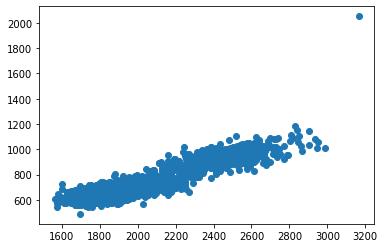

In [ ]:
plt.scatter(lengths, widths)

As seen above, there is a large group of dots, with one reaching the top of both axes. This meant there was indeed an abnormality, which we singled out by searching through our dataset, where the lengths were longer than 3,100.

In [ ]:
outlier = np.where((lengths > 3100))
outlier

(array([1981]),)

With the irregular foot singled out and assigned to a variable 'outlier', we plotted all of the outliers x and y coordinates to see if it resembled a foot.

(0.0, 1.0)

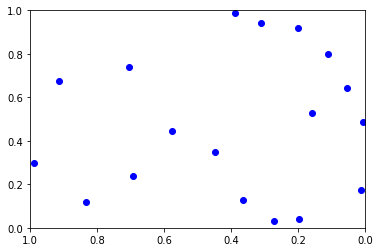

In [ ]:
outlier_value = train_df.iloc[outlier]
irregular_foot = outlier_value

for i in range(18):
  plt.scatter(irregular_foot["y"+str(i)], irregular_foot["x"+str(i)], color="b")

plt.xlim(1, 0)
plt.ylim(0, 1)

As seen in the graph above, it does not look all that foot-like, until we place the photo given to us of an example foot, and stretched the image a lot.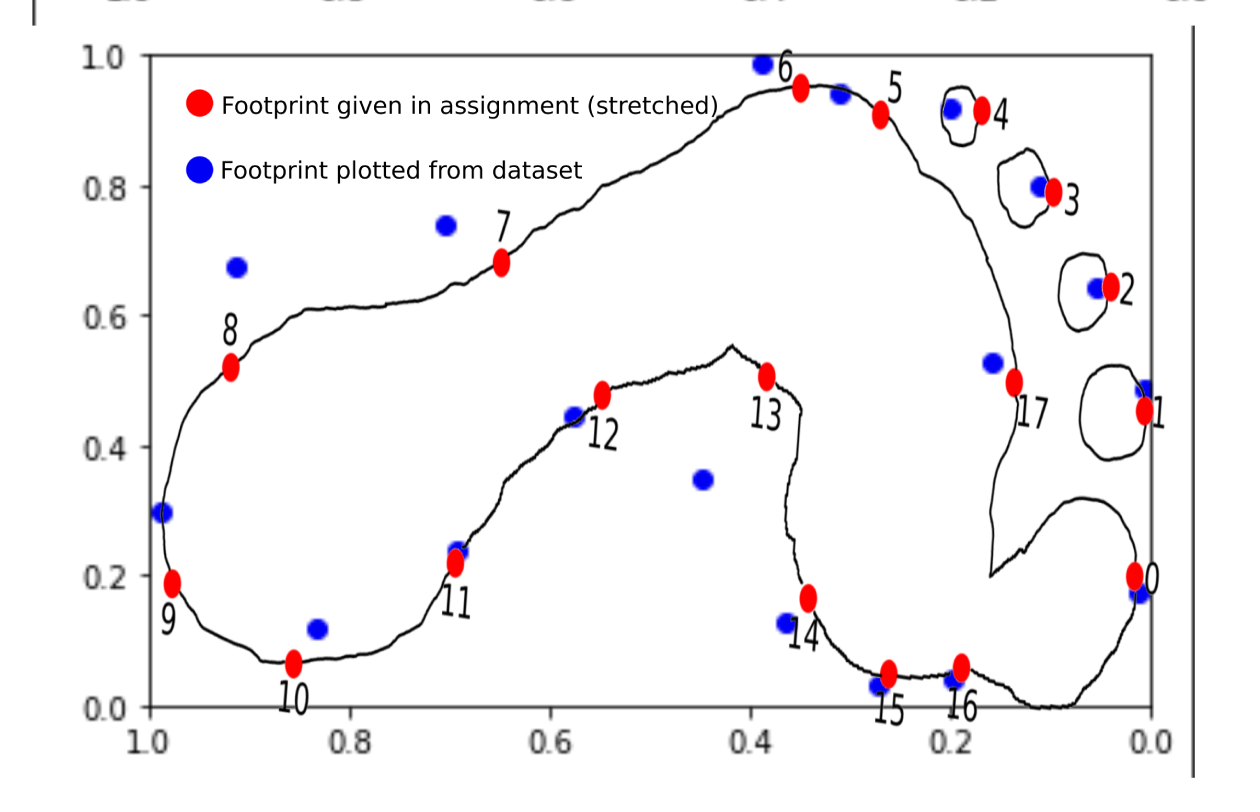

We then did this on a couple more footprints to have a comparison, and that is when we realised that the dataset provided to us had both left and right footprints, something which we had not have thought of before. When comparing the photo above to the couple below, you can clearly see the difference between.

**Left footprint**
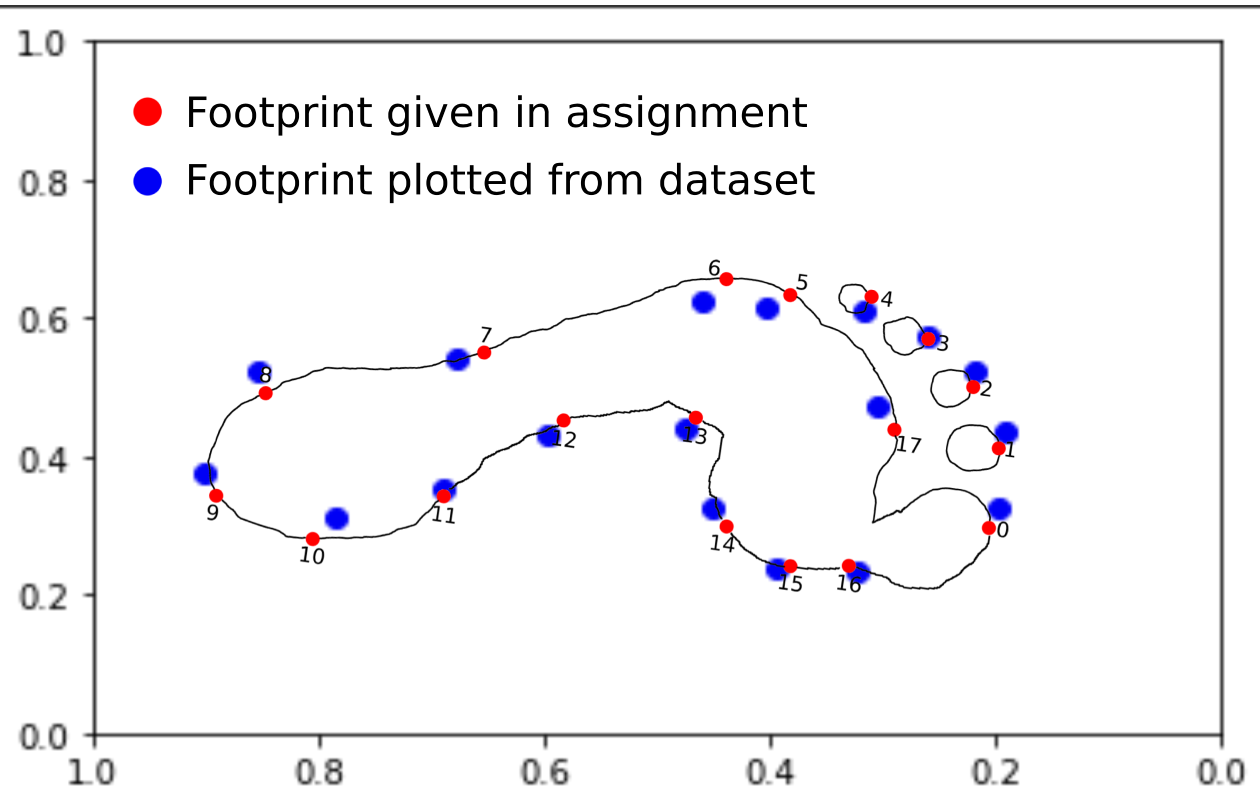

**Right footprint** (supplied footprint, but flipped vertically)
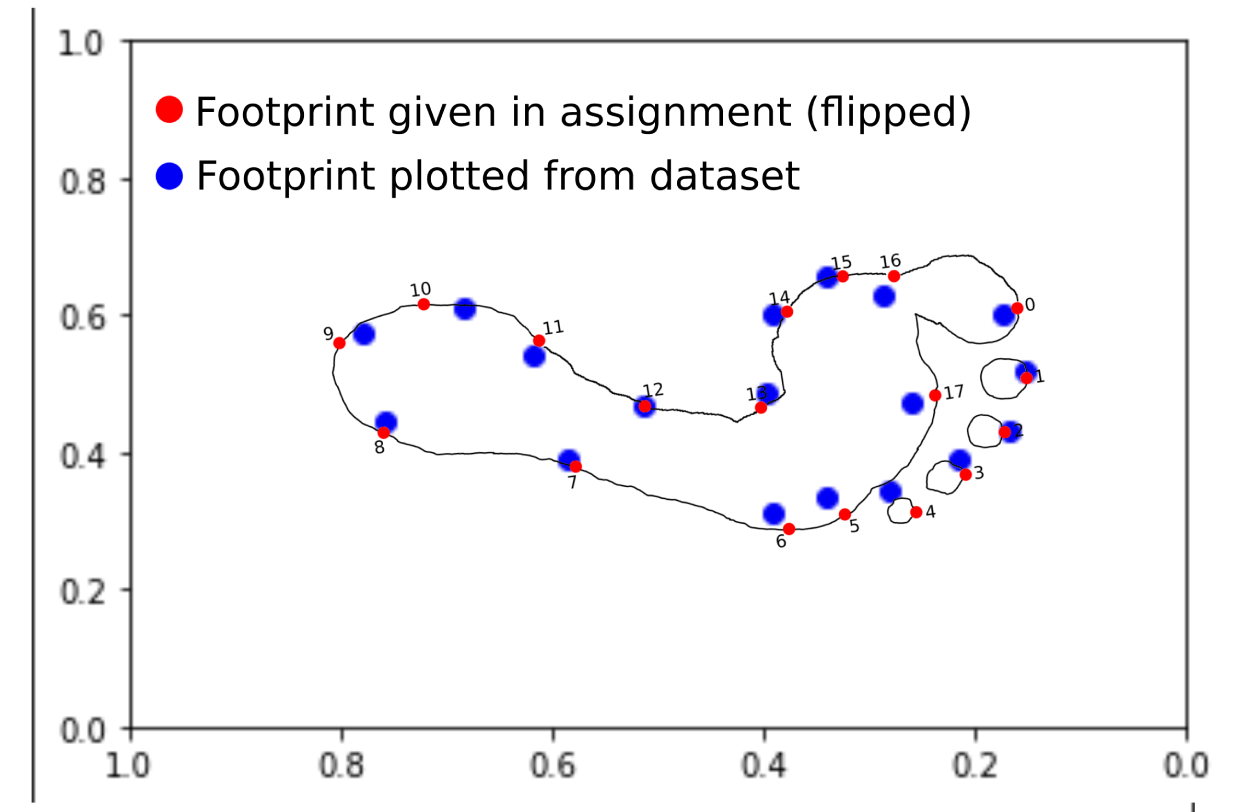

## 2.3 Explore Data
When looking at a data set, you firstly look for any missing or repeating data, as without addressing these before attempting to do any manipulation or prediction, could lead to a loss of accuracy. In the instance of missing data, one of the reasons you would impute data to values that are missing, is because a ‘lack of data may introduce bias, which could potentially invalidate the entire study.' (T. Frisell, 2016). 

Having previously used the ‘describe()’ function, which gives you information such as the count of each attribute, which - if the dataset was full - would give you an identical number of data bits for each attribute as the total count of instances in the dataframe. But having done this, and not getting the same 2,000 count that we did for the instances, we found that some footprints did have missing data. 

We next looked for any repeating data, as it could interfere when modelling because if two footprints are identical, the model will interpret them the same. We tried to delete any repeating data by firstly logging the length of the dataset (which we did above), and then using the ‘drop_duplicates’ function.

Having dropped any duplicates, we re-logged the length of the dataset, but alas we were given 2,000 instances both times, meaning no duplicates were dropped.

In [ ]:
train_df.drop_duplicates()
len(train_df)

2000

# 3. Data Preparation and Modelling

As we knew we would need to predict gender (0 or 1) from the list of feet, we knew that a predictive modelling technique would need to be used. Given the results would be binary, we assumed that a classification technique would be best suited in predicting the gender of the footprint.

## 3.1 Every Classifier on the data set to form a baseline.

We created a baseline from which we can compare future models to see if we are improving as we continue. To create this baseline, we ran six different classification techniques, from which, we will develop into our final model.

### Preparation

One of the first things we have to address the issue of missing values. To start with, we filled the missing values with the mean.

In [ ]:
train_df.describe()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
count,2000.00000,2000.000000,2000.000000,1994.000000,1994.000000,1993.000000,1993.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1983.000000,1983.000000
mean,0.55850,0.487538,0.142495,0.488544,0.148220,0.488321,0.177648,0.487826,0.218273,0.486957,0.272767,0.485293,0.339229,0.483736,0.391514,0.477024,0.581950,0.475605,0.743143,0.476982,0.775661,0.475448,0.682442,0.475880,0.608140,0.478347,0.514928,0.483149,0.407749,0.483490,0.374265,0.481527,0.316086,0.482622,0.257975,0.485124,0.245457
std,0.49669,0.093121,0.059570,0.051502,0.059680,0.094597,0.059735,0.137298,0.059840,0.171293,0.061972,0.175482,0.064906,0.184741,0.068487,0.089184,0.085838,0.059292,0.099844,0.112509,0.102197,0.150311,0.093776,0.101895,0.086237,0.048361,0.076974,0.048621,0.069833,0.119457,0.066957,0.164397,0.064219,0.140620,0.060773,0.051954,0.059889
min,0.00000,0.175532,0.001002,0.220859,0.001002,0.185583,0.021830,0.159509,0.060291,0.108896,0.115385,0.108434,0.172557,0.091867,0.232848,0.151840,0.383768,0.157975,0.526286,0.160572,0.546888,0.111963,0.461924,0.161043,0.398798,0.268405,0.318637,0.272347,0.218295,0.127660,0.180361,0.029255,0.129259,0.042553,0.091182,0.279141,0.083166
25%,0.00000,0.410135,0.099982,0.456053,0.106029,0.406938,0.135271,0.363337,0.176715,0.327892,0.228754,0.321468,0.293543,0.311576,0.341693,0.403738,0.522760,0.436203,0.673583,0.383651,0.702451,0.341932,0.617649,0.387917,0.548044,0.449610,0.462477,0.456981,0.359672,0.377107,0.328315,0.331990,0.271877,0.356151,0.215530,0.451500,0.202468
50%,1.00000,0.486504,0.140632,0.488557,0.146900,0.490798,0.175112,0.521695,0.215431,0.554990,0.268298,0.557388,0.332631,0.558647,0.382448,0.477107,0.565161,0.474609,0.716671,0.474261,0.748052,0.434794,0.660890,0.472178,0.588883,0.478722,0.502227,0.483680,0.398815,0.461438,0.366944,0.420670,0.309592,0.449387,0.253770,0.484450,0.240473
75%,1.00000,0.567022,0.180361,0.520950,0.188130,0.568368,0.216843,0.611989,0.256513,0.645764,0.311850,0.649112,0.378398,0.654856,0.431608,0.551698,0.627078,0.515023,0.798747,0.574128,0.831167,0.614617,0.733651,0.564400,0.655165,0.507516,0.556430,0.510376,0.448935,0.591357,0.415155,0.635003,0.356986,0.611963,0.295962,0.520419,0.282791
max,1.00000,0.764706,0.408115,0.731928,0.371102,0.783133,0.412682,0.853916,0.455301,0.920213,0.523909,0.944149,0.579002,0.989362,0.634096,0.739362,0.843504,0.700301,0.992723,0.866564,0.999016,0.886503,0.934870,0.808282,0.848233,0.697443,0.760915,0.736196,0.643451,0.793323,0.600200,0.861685,0.538462,0.837838,0.476091,0.722892,0.458420


In [ ]:
train_df_d_1 = train_df.fillna(train_df.mean())
train_df_d_1.describe()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.55850,0.487538,0.142495,0.488544,0.148220,0.488321,0.177648,0.487826,0.218273,0.486957,0.272767,0.485293,0.339229,0.483736,0.391514,0.477024,0.581950,0.475605,0.743143,0.476982,0.775661,0.475448,0.682442,0.475880,0.608140,0.478347,0.514928,0.483149,0.407749,0.483490,0.374265,0.481527,0.316086,0.482622,0.257975,0.485124,0.245457
std,0.49669,0.093121,0.059570,0.051424,0.059590,0.094431,0.059630,0.137023,0.059720,0.170950,0.061848,0.175131,0.064776,0.184371,0.068350,0.089005,0.085666,0.059174,0.099644,0.112255,0.101967,0.149973,0.093564,0.101665,0.086043,0.048252,0.076800,0.048512,0.069675,0.119188,0.066806,0.164026,0.064074,0.140303,0.060636,0.051733,0.059634
min,0.00000,0.175532,0.001002,0.220859,0.001002,0.185583,0.021830,0.159509,0.060291,0.108896,0.115385,0.108434,0.172557,0.091867,0.232848,0.151840,0.383768,0.157975,0.526286,0.160572,0.546888,0.111963,0.461924,0.161043,0.398798,0.268405,0.318637,0.272347,0.218295,0.127660,0.180361,0.029255,0.129259,0.042553,0.091182,0.279141,0.083166
25%,0.00000,0.410135,0.099982,0.456152,0.106128,0.406969,0.135549,0.363457,0.176983,0.327908,0.228801,0.321564,0.294060,0.311712,0.341988,0.403816,0.522952,0.436262,0.673597,0.383953,0.702678,0.342442,0.617975,0.388005,0.548095,0.449905,0.462526,0.457055,0.360120,0.377372,0.328452,0.332133,0.272190,0.356249,0.215774,0.452292,0.202703
50%,1.00000,0.486504,0.140632,0.488544,0.147169,0.489558,0.175304,0.514918,0.215636,0.549837,0.268579,0.552628,0.332737,0.555007,0.382938,0.477024,0.565649,0.475159,0.717182,0.475376,0.748414,0.438721,0.661178,0.475323,0.589222,0.478528,0.502338,0.483349,0.399255,0.465532,0.367347,0.426140,0.309745,0.453699,0.254177,0.485124,0.241290
75%,1.00000,0.567022,0.180361,0.520889,0.188071,0.568160,0.216442,0.611912,0.256177,0.645558,0.311708,0.649062,0.378381,0.654719,0.431200,0.551669,0.626719,0.514821,0.797150,0.574049,0.830686,0.614617,0.733543,0.564388,0.654482,0.507461,0.555984,0.510056,0.448347,0.591237,0.415032,0.634898,0.356740,0.611612,0.295818,0.519887,0.282565
max,1.00000,0.764706,0.408115,0.731928,0.371102,0.783133,0.412682,0.853916,0.455301,0.920213,0.523909,0.944149,0.579002,0.989362,0.634096,0.739362,0.843504,0.700301,0.992723,0.866564,0.999016,0.886503,0.934870,0.808282,0.848233,0.697443,0.760915,0.736196,0.643451,0.793323,0.600200,0.861685,0.538462,0.837838,0.476091,0.722892,0.458420


In [ ]:
X_1 = train_df_d_1.drop('sex', axis=1)
y_1 = train_df_d_1[['sex']]
X_1.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,0.556673,0.064617,0.459606,0.083429,0.395285,0.117782,0.361370,0.157043,0.328624,0.202848,0.328624,0.279733,0.325116,0.317358,0.436216,0.516934,0.473640,0.674795,0.597605,0.705059,0.638537,0.622448,0.583571,0.537382,0.502877,0.445774,0.495860,0.337807,0.591757,0.297728,0.626842,0.242926,0.591757,0.181581,0.463115,0.180763
1,0.601897,0.171537,0.519308,0.152283,0.431714,0.167161,0.391671,0.213546,0.342868,0.280936,0.332858,0.341324,0.310334,0.391210,0.387917,0.584626,0.442976,0.758789,0.574367,0.780669,0.611908,0.682648,0.541832,0.618759,0.469254,0.513736,0.485522,0.398211,0.603148,0.390334,0.654453,0.339573,0.630678,0.286187,0.473008,0.258181
2,0.327504,0.195426,0.437202,0.191268,0.523052,0.216216,0.575517,0.258836,0.610493,0.317048,0.616852,0.403326,0.623211,0.458420,0.543720,0.677755,0.521463,0.853430,0.375199,0.902287,0.310016,0.783784,0.351351,0.688150,0.430843,0.596674,0.440382,0.474012,0.325914,0.451143,0.238474,0.395010,0.235294,0.322245,0.470588,0.304574
3,0.594496,0.111449,0.498477,0.120736,0.458640,0.153599,0.416760,0.191463,0.386116,0.235043,0.406545,0.290052,0.400416,0.325059,0.503585,0.499376,0.554658,0.637258,0.648634,0.657976,0.677235,0.587964,0.648634,0.513664,0.558744,0.425791,0.550572,0.328631,0.633312,0.310056,0.669063,0.262190,0.645569,0.207895,0.515842,0.202894
4,0.616850,0.231525,0.544279,0.222445,0.489851,0.260579,0.450974,0.288725,0.410801,0.344109,0.403026,0.404034,0.387475,0.445799,0.476892,0.611952,0.484668,0.778105,0.581861,0.818054,0.622034,0.733616,0.583156,0.680955,0.488555,0.574726,0.492443,0.470313,0.577973,0.429456,0.663502,0.400402,0.657023,0.345925,0.522249,0.322319


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)
X_train_1.shape, X_test_1.shape

((1600, 36), (400, 36))

### Modelling

#### Linear Classifer

In [ ]:
#Train Classifier
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train_1, y_train_1.squeeze())

#Predict Sex
lr_pred_1 = lr_model_1.predict(X_test_1)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_1, lr_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, lr_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, lr_pred_1)
print(report)
creport = classification_report(y_test_1,lr_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.7
AUC: 0.6839151646907152
[[ 95  84]
 [ 36 185]]
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.84      0.76       221
           0       0.73      0.53      0.61       179

    accuracy                           0.70       400
   macro avg       0.71      0.68      0.68       400
weighted avg       0.70      0.70      0.69       400



#### K-Nearest Neighbour Classifier

In [ ]:
#Train Classifier
knn_model_1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_model_1.fit(X_train_1, y_train_1.squeeze())

#Predict Sex
knn_pred_1 = knn_model_1.predict(X_test_1)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_1, knn_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, knn_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, knn_pred_1)
print(report)
creport = classification_report(y_test_1,knn_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.745
AUC: 0.7347253469501251
[[114  65]
 [ 37 184]]
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       221
           0       0.75      0.64      0.69       179

    accuracy                           0.74       400
   macro avg       0.75      0.73      0.74       400
weighted avg       0.75      0.74      0.74       400



#### Decision Tree Classifier

In [ ]:
#Train Classifier
dt_model_1 = tree.DecisionTreeClassifier(random_state = 1)
dt_model_1.fit(X_train_1, y_train_1.squeeze())

#Predict Sex
dt_pred_1 = dt_model_1.predict(X_test_1)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_1, dt_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, dt_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, dt_pred_1)
print(report)
creport = classification_report(y_test_1,dt_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.7425
AUC: 0.7383022826663971
[[125  54]
 [ 49 172]]
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.78      0.77       221
           0       0.72      0.70      0.71       179

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



#### Naive Bayes Classifier

In [ ]:
#Train Classifier
nb_model_1 = GaussianNB()
nb_model_1 = nb_model_1.fit(X_train_1, y_train_1.squeeze())

#Predict Sex
nb_pred_1 = nb_model_1.predict(X_test_1)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_1, nb_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, nb_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, nb_pred_1)
print(report)
creport = classification_report(y_test_1,nb_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.6275
AUC: 0.6310447685735231
[[119  60]
 [ 89 132]]
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.60      0.64       221
           0       0.57      0.66      0.61       179

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.64      0.63      0.63       400



#### Support Vector Machines Classifier

In [ ]:
#Train Classifier
svm_model_1 = svm.SVC()
svm_model_1 = svm_model_1.fit(X_train_1,y_train_1.squeeze())

#Predict Sex
svm_pred_1 = svm_model_1.predict(X_test_1)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_1, svm_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, svm_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, svm_pred_1)
print(report)
creport = classification_report(y_test_1,svm_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.7475
AUC: 0.733271821835739
[[107  72]
 [ 29 192]]
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.87      0.79       221
           0       0.79      0.60      0.68       179

    accuracy                           0.75       400
   macro avg       0.76      0.73      0.74       400
weighted avg       0.75      0.75      0.74       400



#### Stochastic Gradient Descent

In [ ]:
sgd_1 = SGDClassifier(loss='log', shuffle=True, random_state=5)
sgd_1 = sgd_1.fit(X_train_1, y_train_1)
sdg_pred_1 = sgd_1.predict(X_test_1)

print('Accuracy:', metrics.accuracy_score(y_test_1, sdg_pred_1))
print('AUC:', metrics.roc_auc_score(y_test_1, sdg_pred_1))

#confusion matrix 
report = confusion_matrix(y_test_1, sdg_pred_1)
print(report)
creport = classification_report(y_test_1,sdg_pred_1,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.6475
AUC: 0.6093303672994768
[[ 44 135]
 [  6 215]]
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.97      0.75       221
           0       0.88      0.25      0.38       179

    accuracy                           0.65       400
   macro avg       0.75      0.61      0.57       400
weighted avg       0.73      0.65      0.59       400



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Comparing Baseline Classifiers

To compare the performance of the models, the main scores we looked at were the accuracy score and the f-score. We looked at the accuracy to give us an indication of what percentage of the data it correctly predicted, and we looked at the f-score as it gives us an indication of both the precision and recall of the selected model. 

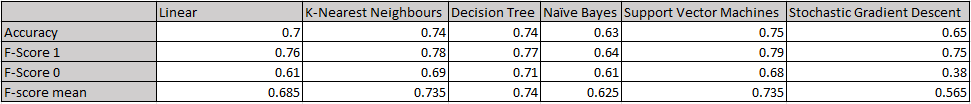

We put the numbers generated by the code into the chart above. From this chart we determined that we would move forward with k-nearest neighbours (knn) and decision tree, as the accuracy and f-scores for both models are close to 1. We thought knn would be good to use for this classification problem as it is easy to understand but can also model complex boundaries which we assumed this data could have. 

Due to this reason, we chose to avoid linear classifiers. The reasons we chose to use a decision tree model is because they are easy to understand as choices are made in a logical way. It is also robust to outliers, and can handle them effectively. 

## 3.2 Improving The Two Best Classification Techniques

### Preparation

We chose lengths and widths as our initial queries, as this would help us predict more accurately the sex of the foot, as "Men have longer and broader feet than women for a given stature." (Wunderlich RE, Cavanagh PR, 2001).

When we added the lengths and widths, we considered the resolution of the images as normalising the data means that a change in distance in the x axis will not be the same in the y axis. Therefore, adding in the resolution values into the euclidean distance equation will result in the right distances for the image will be calculated.


In [ ]:
#fill in means again
train_df_d_2 = train_df.fillna(train_df.mean())

In [ ]:
#adding lenth and widths
w,h = 2240,3200

train_df_d_2['lengths'] = np.sqrt((train_df_d_2['x1']*w - train_df_d_2['x9']*w)**2 + (train_df_d_2['y1']*h - train_df_d_2['y9']*h)**2)
train_df_d_2['widths'] = np.sqrt((train_df_d_2['x5']*w - train_df_d_2['x15']*w)**2 + (train_df_d_2['y5']*h - train_df_d_2['y15']*h)**2)
train_df_d_2.head()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,lengths,widths
0,0,0.556673,0.064617,0.459606,0.083429,0.395285,0.117782,0.361370,0.157043,0.328624,0.202848,0.328624,0.279733,0.325116,0.317358,0.436216,0.516934,0.473640,0.674795,0.597605,0.705059,0.638537,0.622448,0.583571,0.537382,0.502877,0.445774,0.495860,0.337807,0.591757,0.297728,0.626842,0.242926,0.591757,0.181581,0.463115,0.180763,2013.089484,678.311833
1,0,0.601897,0.171537,0.519308,0.152283,0.431714,0.167161,0.391671,0.213546,0.342868,0.280936,0.332858,0.341324,0.310334,0.391210,0.387917,0.584626,0.442976,0.758789,0.574367,0.780669,0.611908,0.682648,0.541832,0.618759,0.469254,0.513736,0.485522,0.398211,0.603148,0.390334,0.654453,0.339573,0.630678,0.286187,0.473008,0.258181,2014.613181,720.395998
2,1,0.327504,0.195426,0.437202,0.191268,0.523052,0.216216,0.575517,0.258836,0.610493,0.317048,0.616852,0.403326,0.623211,0.458420,0.543720,0.677755,0.521463,0.853430,0.375199,0.902287,0.310016,0.783784,0.351351,0.688150,0.430843,0.596674,0.440382,0.474012,0.325914,0.451143,0.238474,0.395010,0.235294,0.322245,0.470588,0.304574,2279.494929,847.985223
3,1,0.594496,0.111449,0.498477,0.120736,0.458640,0.153599,0.416760,0.191463,0.386116,0.235043,0.406545,0.290052,0.400416,0.325059,0.503585,0.499376,0.554658,0.637258,0.648634,0.657976,0.677235,0.587964,0.648634,0.513664,0.558744,0.425791,0.550572,0.328631,0.633312,0.310056,0.669063,0.262190,0.645569,0.207895,0.515842,0.202894,1751.762167,594.760714
4,1,0.616850,0.231525,0.544279,0.222445,0.489851,0.260579,0.450974,0.288725,0.410801,0.344109,0.403026,0.404034,0.387475,0.445799,0.476892,0.611952,0.484668,0.778105,0.581861,0.818054,0.622034,0.733616,0.583156,0.680955,0.488555,0.574726,0.492443,0.470313,0.577973,0.429456,0.663502,0.400402,0.657023,0.345925,0.522249,0.322319,1907.806791,583.583167


In [ ]:
X_2 = train_df_d_2.drop('sex', axis=1)
y_2 = train_df_d_2[['sex']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

### Modelling

#### K-Nearest Neighbours Classifier

In [ ]:
#Train Classifier
knn_model_2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_model_2.fit(X_train_2, y_train_2.squeeze())

#Predict Sex
knn_pred_2 = knn_model_2.predict(X_test_2)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_2, knn_pred_2))
print('AUC:', metrics.roc_auc_score(y_test_2, knn_pred_2))

#confusion matrix 
report = confusion_matrix(y_test_2, knn_pred_2)
print(report)
creport = classification_report(y_test_2,knn_pred_2,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.8125
AUC: 0.8096134887130616
[[140  39]
 [ 36 185]]
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.83       221
           0       0.80      0.78      0.79       179

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



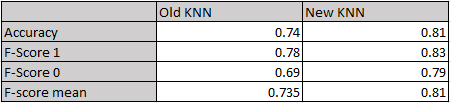

As the chart above shows every value for the new knn model we have created has improved against the old one we created. This shows that for this model, adding the lengths and widths increases how well this model performs when predicting sex.

#### Decision Tree Classifier

In [ ]:
#Train Classifier
dt_model_2 = tree.DecisionTreeClassifier(random_state = 1)
dt_model_2.fit(X_train_2, y_train_2.squeeze())

#Predict Sex
dt_pred_2 = dt_model_2.predict(X_test_2)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_2, dt_pred_2))
print('AUC:', metrics.roc_auc_score(y_test_2, dt_pred_2))

#confusion matrix 
report = confusion_matrix(y_test_2, dt_pred_2)
print(report)
creport = classification_report(y_test_2,dt_pred_2,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.77
AUC: 0.7642508657953941
[[127  52]
 [ 40 181]]
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.82      0.80       221
           0       0.76      0.71      0.73       179

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.77       400
weighted avg       0.77      0.77      0.77       400



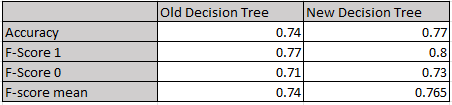

The chart above shows that the data processing we performed has increased the performance of the model, as all the statistics have increased. However, the increase is not as significant as it is for our improved knn model. This could mean that the improved knn model is more suitable for the determination of gender than the decision tree model.

## 3.3 Improving Models Further

### Preparation

To improve the score further we changed how we delt with missing values. Instead of replacing a missing value with the mean, we decided it would be better if we found the foot that closely matched the one with the missing values and then replace the missing values with that value.

In [ ]:
imputer = KNNImputer(n_neighbors=6, weights='uniform')
train_df_d_3 = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
train_df_d_3.describe()

w,h = 2240,3200

train_df_d_3['lengths'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['widths'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y15']*h)**2)


Doing this resulted in the same accuracy as before. This could be because we are running the knn model after knn imputation so it would not matter what the missing values are as it will get the closest foot when predicting the sex.
The next way we thought to improve the score was adding more distances. As adding distances increased the score before, we assumed that the more distances we add the more the score will improve.

To calculate every pairwise distance we created a distance matrix in order to help us plot every point and to make sure we were not repeating points as x0 to x1 is the same as x1 to x0. As we already had lengths and widths we did not need to add those again.


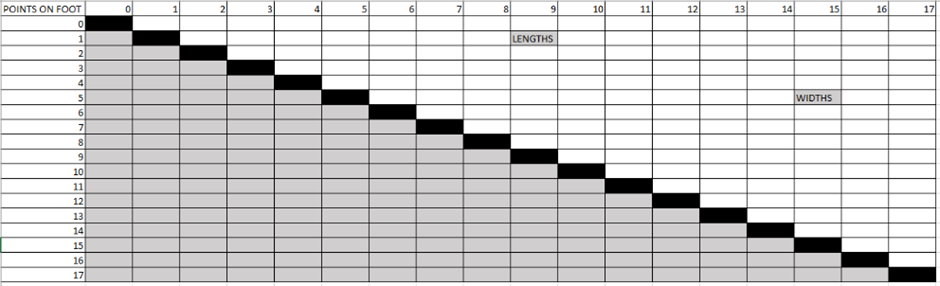

In [ ]:
#All Pairwise Distances
#0-n
train_df_d_3['0-1'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x1']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y1']*h)**2)
train_df_d_3['0-2'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x2']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y2']*h)**2)
train_df_d_3['0-3'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x3']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y3']*h)**2)
train_df_d_3['0-4'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x4']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y4']*h)**2)
train_df_d_3['0-5'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x5']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y5']*h)**2)
train_df_d_3['0-6'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['0-7'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['0-8'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['0-9'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['0-10'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['0-11'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['0-12'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['0-13'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['0-14'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['0-15'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['0-16'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['0-17'] = np.sqrt((train_df_d_3['x0']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y0']*h - train_df_d_3['y17']*h)**2)
#1-n
train_df_d_3['1-2'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x2']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y2']*h)**2)
train_df_d_3['1-3'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x3']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y3']*h)**2)
train_df_d_3['1-4'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x4']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y4']*h)**2)
train_df_d_3['1-5'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x5']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y5']*h)**2)
train_df_d_3['1-6'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['1-7'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['1-8'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['1-10'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['1-11'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['1-12'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['1-13'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['1-14'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['1-15'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['1-16'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['1-17'] = np.sqrt((train_df_d_3['x1']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y1']*h - train_df_d_3['y17']*h)**2)
#2-n
train_df_d_3['2-3'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x3']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y3']*h)**2)
train_df_d_3['2-4'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x4']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y4']*h)**2)
train_df_d_3['2-5'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x5']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y5']*h)**2)
train_df_d_3['2-6'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['2-7'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['2-8'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['2-9'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['2-10'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['2-11'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['2-12'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['2-13'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['2-14'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['2-15'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['2-16'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['2-17'] = np.sqrt((train_df_d_3['x2']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y2']*h - train_df_d_3['y17']*h)**2)
#3-n
train_df_d_3['3-4'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x4']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y4']*h)**2)
train_df_d_3['3-5'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x5']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y5']*h)**2)
train_df_d_3['3-6'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['3-7'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['3-8'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['3-9'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['3-10'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['3-11'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['3-12'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['3-13'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['3-14'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['3-15'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['3-16'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['3-17'] = np.sqrt((train_df_d_3['x3']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y3']*h - train_df_d_3['y17']*h)**2)
#4-n
train_df_d_3['4-5'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x5']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y5']*h)**2)
train_df_d_3['4-6'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['4-7'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['4-8'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['4-9'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['4-10'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['4-11'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['4-12'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['4-13'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['4-14'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['4-15'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['4-16'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['4-17'] = np.sqrt((train_df_d_3['x4']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y4']*h - train_df_d_3['y17']*h)**2)
#5-n
train_df_d_3['5-6'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x6']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y6']*h)**2)
train_df_d_3['5-7'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['5-8'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['5-9'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['5-10'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['5-11'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['5-12'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['5-13'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['5-14'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['5-16'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['5-17'] = np.sqrt((train_df_d_3['x5']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y5']*h - train_df_d_3['y17']*h)**2)
#6-n
train_df_d_3['6-7'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x7']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y7']*h)**2)
train_df_d_3['6-8'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['6-9'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['6-10'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['6-11'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['6-12'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['6-13'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['6-14'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['6-15'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['6-16'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['6-17'] = np.sqrt((train_df_d_3['x6']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y6']*h - train_df_d_3['y17']*h)**2)
#7-n
train_df_d_3['7-8'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x8']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y8']*h)**2)
train_df_d_3['7-9'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['7-10'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['7-11'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['7-12'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['7-13'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['7-14'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['7-15'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['7-16'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['7-17'] = np.sqrt((train_df_d_3['x7']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y7']*h - train_df_d_3['y17']*h)**2)
#8-n
train_df_d_3['8-9'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x9']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y9']*h)**2)
train_df_d_3['8-10'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['8-11'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['8-12'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['8-13'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['8-14'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['8-15'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['8-16'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['8-17'] = np.sqrt((train_df_d_3['x8']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y8']*h - train_df_d_3['y17']*h)**2)
#9-n
train_df_d_3['9-10'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x10']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y10']*h)**2)
train_df_d_3['9-11'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['9-12'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['9-13'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['9-14'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['9-15'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['9-16'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['9-17'] = np.sqrt((train_df_d_3['x9']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y9']*h - train_df_d_3['y17']*h)**2)
#10-n
train_df_d_3['10-11'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x11']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y11']*h)**2)
train_df_d_3['10-12'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['10-13'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['10-14'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['10-15'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['10-16'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['10-17'] = np.sqrt((train_df_d_3['x10']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y10']*h - train_df_d_3['y17']*h)**2)
#11-n
train_df_d_3['11-12'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x12']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y12']*h)**2)
train_df_d_3['11-13'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['11-14'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['11-15'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['11-16'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['11-17'] = np.sqrt((train_df_d_3['x11']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y11']*h - train_df_d_3['y17']*h)**2)
#12-n
train_df_d_3['12-13'] = np.sqrt((train_df_d_3['x12']*w - train_df_d_3['x13']*w)**2 + (train_df_d_3['y12']*h - train_df_d_3['y13']*h)**2)
train_df_d_3['12-14'] = np.sqrt((train_df_d_3['x12']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y12']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['12-15'] = np.sqrt((train_df_d_3['x12']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y12']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['12-16'] = np.sqrt((train_df_d_3['x12']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y12']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['12-17'] = np.sqrt((train_df_d_3['x12']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y12']*h - train_df_d_3['y17']*h)**2)
#13-n
train_df_d_3['13-14'] = np.sqrt((train_df_d_3['x13']*w - train_df_d_3['x14']*w)**2 + (train_df_d_3['y13']*h - train_df_d_3['y14']*h)**2)
train_df_d_3['13-15'] = np.sqrt((train_df_d_3['x13']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y13']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['13-16'] = np.sqrt((train_df_d_3['x13']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y13']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['13-17'] = np.sqrt((train_df_d_3['x13']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y13']*h - train_df_d_3['y17']*h)**2)
#14-n
train_df_d_3['14-15'] = np.sqrt((train_df_d_3['x14']*w - train_df_d_3['x15']*w)**2 + (train_df_d_3['y14']*h - train_df_d_3['y15']*h)**2)
train_df_d_3['14-16'] = np.sqrt((train_df_d_3['x14']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y14']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['14-17'] = np.sqrt((train_df_d_3['x14']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y14']*h - train_df_d_3['y17']*h)**2)
#15-n
train_df_d_3['15-16'] = np.sqrt((train_df_d_3['x15']*w - train_df_d_3['x16']*w)**2 + (train_df_d_3['y15']*h - train_df_d_3['y16']*h)**2)
train_df_d_3['15-17'] = np.sqrt((train_df_d_3['x15']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y15']*h - train_df_d_3['y17']*h)**2)
#16-n
train_df_d_3['16-17'] = np.sqrt((train_df_d_3['x16']*w - train_df_d_3['x17']*w)**2 + (train_df_d_3['y16']*h - train_df_d_3['y17']*h)**2)

train_df_d_3.head()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,lengths,widths,0-1,...,8-14,8-15,8-16,8-17,9-10,9-11,9-12,9-13,9-14,9-15,9-16,9-17,10-11,10-12,10-13,10-14,10-15,10-16,10-17,11-12,11-13,11-14,11-15,11-16,11-17,12-13,12-14,12-15,12-16,12-17,13-14,13-15,13-16,13-17,14-15,14-16,14-17,15-16,15-17,16-17
0,0.0,0.556673,0.064617,0.459606,0.083429,0.395285,0.117782,0.361370,0.157043,0.328624,0.202848,0.328624,0.279733,0.325116,0.317358,0.436216,0.516934,0.473640,0.674795,0.597605,0.705059,0.638537,0.622448,0.583571,0.537382,0.502877,0.445774,0.495860,0.337807,0.591757,0.297728,0.626842,0.242926,0.591757,0.181581,0.463115,0.180763,2013.089484,678.311833,225.609866,...,1235.283863,1423.951716,1600.308652,1581.078137,279.804859,537.484606,856.415125,1197.102441,1303.525024,1480.273660,1675.179516,1704.578311,298.758522,641.848129,965.293254,1044.373070,1214.750522,1414.658257,1466.995643,344.394839,668.181139,767.113884,947.231787,1138.711432,1172.646038,345.852559,513.881551,706.012573,868.542783,852.698200,250.184025,422.216200,544.118166,507.863307,192.169544,371.669093,472.362840,211.451062,417.222734,288.172054
1,0.0,0.601897,0.171537,0.519308,0.152283,0.431714,0.167161,0.391671,0.213546,0.342868,0.280936,0.332858,0.341324,0.310334,0.391210,0.387917,0.584626,0.442976,0.758789,0.574367,0.780669,0.611908,0.682648,0.541832,0.618759,0.469254,0.513736,0.485522,0.398211,0.603148,0.390334,0.654453,0.339573,0.630678,0.286187,0.473008,0.258181,2014.613181,720.395998,194.989145,...,1232.435494,1422.671916,1569.685338,1603.358038,324.743999,523.212427,886.041430,1239.939802,1250.732540,1422.859135,1587.361359,1687.306573,257.752971,627.906367,953.208269,935.607881,1101.966017,1269.370648,1393.472577,373.330076,716.935677,743.749877,928.327445,1082.678125,1164.102791,371.471433,495.870780,694.768406,812.994117,817.819934,264.686040,422.374951,483.971338,448.972661,198.978831,338.929142,513.631310,178.945758,482.730111,364.372675
2,1.0,0.327504,0.195426,0.437202,0.191268,0.523052,0.216216,0.575517,0.258836,0.610493,0.317048,0.616852,0.403326,0.623211,0.458420,0.543720,0.677755,0.521463,0.853430,0.375199,0.902287,0.310016,0.783784,0.351351,0.688150,0.430843,0.596674,0.440382,0.474012,0.325914,0.451143,0.238474,0.395010,0.235294,0.322245,0.470588,0.304574,2279.494929,847.985223,246.083348,...,1359.800326,1598.044827,1816.644325,1760.034128,406.348365,687.318049,985.873473,1378.234088,1447.873970,1651.923485,1882.402962,1924.579963,319.729548,657.082253,1033.386553,1065.044615,1254.353890,1486.377060,1575.089628,342.625968,713.669389,760.557347,971.524986,1199.406586,1256.166109,393.096743,521.648234,775.964531,981.352362,938.949739,266.645809,518.133648,668.509708,546.409346,265.761338,459.716535,570.091033,232.957138,595.050034,530.083745
3,1.0,0.594496,0.111449,0.498477,0.120736,0.458640,0.153599,0.416760,0.191463,0.386116,0.235043,0.406545,0.290052,0.400416,0.325059,0.503585,0.499376,0.554658,0.637258,0.648634,0.657976,0.677235,0.587964,0.648634,0.513664,0.558744,0.425791,0.550572,0.328631,0.633312,0.310056,0.669063,0.262190,0.645569,0.207895,0.515842,0.202894,1751.762167,594.760714,217.124369,...,1061.766063,1227.270896,1388.972119,1392.682634,233.020808,461.797862,769.791687,1076.552353,1113.873243,1267.341396,1440.277017,1486.331492,246.237835,582.887082,877.025714,894.729823,1042.635075,1218.286728,1284.160944,345.850592,631.537855,652.449834,806.017187,978.486874,1037.997965,311.451784,406.276312,578.914524,723.885128,719.716654,194.633756,340.073693,441.079808,409.810295,172.842572,328.067319,432.239927,181.540876,392.173910,291.028147
4,1.0,0.616850,0.231525,0.544279,0.222445,0.489851,0.260579,0.450974,0.288725,0.410801,0.344109,0.403026,0.404034,0.387475,0.445799,0.476892,0.611952,0.484668,0.778105,0.581861,0.818054,0.622034,0.733616,0.583156,0.680955,0.488555,0.574726,0.492443,0.470313,0.577973,0.429456,0.663502,0.400402,0.657023,0.345925,0.522249,0.322319,

In [ ]:
X_3 = train_df_d_3.drop('sex', axis=1)
y_3 = train_df_d_3[['sex']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

### Modelling

#### Improving Knn

In [ ]:
#Train Classifier
knn_model_3 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_model_3.fit(X_train_3, y_train_3.squeeze())

#Predict Sex
knn_pred_3 = knn_model_3.predict(X_test_3)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_3, knn_pred_3))
print('AUC:', metrics.roc_auc_score(y_test_3, knn_pred_3))

#confusion matrix 
report = confusion_matrix(y_test_3, knn_pred_3)
print(report)
creport = classification_report(y_test_3,knn_pred_3,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.82
AUC: 0.8201167875831037
[[147  32]
 [ 40 181]]
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.83       221
           0       0.79      0.82      0.80       179

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Adding all these distances only improved the accuracy our model from 0.8125 to 0.82. We concluded that after adding all of these attributes, the jump was not as high because knn performs poorly the more attributes that are added. This could suggest that we are nearing the sweet spot for how many attributes knn can process with this data set.

We then tried to increase the score by finding the optimal amount of neighbours. We plotted the model with neighbours on a graph to show the best number of neighbours from 1 neighbour to 35. It is important to find the right k value as we want to reduce the number of errors while maintaining prediction accuracy for unseen data. If the K value becomes too high, then the errors will increase and we know we have opted for too many neighbours.


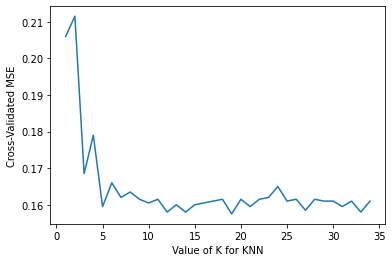

In [ ]:
#GRAPH code to see what number of neighbours is the best
%matplotlib inline

#choose neighbours between 1 and 31.
k_range = range(1,35)

k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    loss = abs(cross_val_score(knn, X_3, y_3.squeeze(), cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [ ]:
#Train Classifier
knn_model_3 = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn_model_3.fit(X_train_3, y_train_3.squeeze())

#Predict Sex
knn_pred_3 = knn_model_3.predict(X_test_3)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_3, knn_pred_3))
print('AUC:', metrics.roc_auc_score(y_test_3, knn_pred_3))

#confusion matrix 
report = confusion_matrix(y_test_3, knn_pred_3)
print(report)
creport = classification_report(y_test_3,knn_pred_3,labels=[1,0])
print('Classification report : \n',creport)

Accuracy: 0.8075
AUC: 0.8072120124371194
[[144  35]
 [ 42 179]]
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.81      0.82       221
           0       0.77      0.80      0.79       179

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



After plotting the neighbours, we determined that the best number of neighbours would be around 12. But after trying a variety of neighbours, none improved the score so we opted to stick to 7 as it was the best so far.

#### Bagged KNN

After this, we decided to move on to a knn ensemble. We thought this would be good as it would improve the model’s stability and prevent overfitting. We used a bagging knn ensemble which makes each knn model test on a different subset of the data then combines the result to give the final model. Therefore, running it multiple times can see variations in the result.

The first thing we wanted to do was to check how many knn estimators we should use to avoid overfitting the data.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

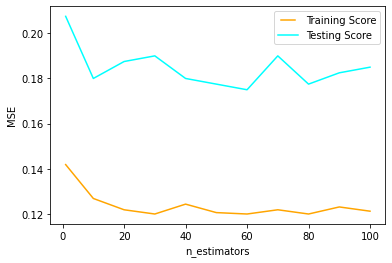

In [ ]:
#code to check overfitting and best number of estimators for bagging
train_results = []
train_results = []
test_results = []
list_nb_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for nb_estimators in list_nb_estimators:
    bagged_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7, metric='euclidean'), n_estimators=nb_estimators)
    bagged_knn.fit(X_train_3, y_train_3)

    train_results.append(mean_squared_error(y_train_3, bagged_knn.predict(X_train_3)))
    test_results.append(mean_squared_error(y_test_3, bagged_knn.predict(X_test_3)))

line1, = plt.plot(list_nb_estimators, train_results, color="orange", label="Training Score")
line2, = plt.plot(list_nb_estimators, test_results, color="cyan", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

From the graph, we determined that the best number of estimators to use would be around 90.

In [ ]:
#Train Classifier
bagged_knn_3 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7, metric='euclidean'), n_estimators=90)
bagged_knn_3.fit(X_train_3,y_train_3)

#Predict Sex
bagged_knn_pred_3 = bagged_knn_3.predict(X_test_3)

#Evaluation
print('Accuracy:', metrics.accuracy_score(y_test_3, bagged_knn_pred_3))
print('AUC:', metrics.roc_auc_score(y_test_3, bagged_knn_pred_3))

#confusion matrix 
report = confusion_matrix(y_test_3, bagged_knn_pred_3)
print(report)
creport = classification_report(y_test_3,bagged_knn_pred_3,labels=[1,0])
print('Classification report : \n',creport)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.82
AUC: 0.8185242296316895
[[144  35]
 [ 37 184]]
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.83      0.84       221
           0       0.80      0.80      0.80       179

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



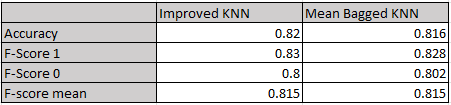

To calculate the bagged results above we took an average of 5 tests as the results change every time due to each iteration being trained on a different split. When comparing the improved knn to the one that uses the same model for bagging, we can see that the bagged knns result is around the same as the improved. This does not mean that the bagged one is worse. We would argue that the bagged model is an improvement over the knn model as it takes overfitting into account and averages multiple k-models rather than just one. Therefore, the bagged knn model would be our best so far.

 #### Random Forest

We chose random forest to improve the stability and to reduce the likelihood of overfitting. Also, decision tree was the 2nd best method so we wanted to improve it.

The first thing we did was check how many trees we should use to prevent overfitting.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

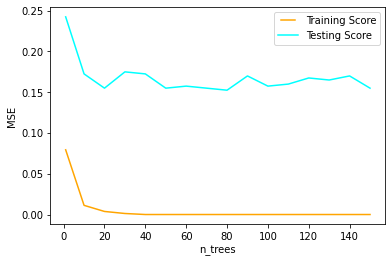

In [ ]:
#check rf overfitting and best number of trees to use

train_results = []
train_results = []
test_results = []
list_nb_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(X_train_3, y_train_3)

    train_results.append(mean_squared_error(y_train_3, rf.predict(X_train_3)))
    test_results.append(mean_squared_error(y_test_3, rf.predict(X_test_3)))

line1, = plt.plot(list_nb_trees, train_results, color="orange", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="cyan", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_trees')
plt.show()

From the graph we found that around 80 trees were best. When we plot the graph with random forest the mean squared error levels out regardless of the number of trees. This is due to it being hard to overfit a random forest.

In [ ]:
#Train Model
rf_model_3 = RandomForestClassifier(n_estimators=80)
rf_model_3.fit(X_train_3,y_train_3)

#Predict Sex
rf_pred_3 = rf_model_3.predict(X_test_3)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_3, rf_pred_3))
print('AUC:', metrics.roc_auc_score(y_test_3, rf_pred_3))

#confusion matrix 
report = confusion_matrix(y_test_3, rf_pred_3)
print(report)
creport = classification_report(y_test_3,rf_pred_3,labels=[1,0])
print('Classification report : \n',creport)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.8375
AUC: 0.8332996284031445
[[142  37]
 [ 28 193]]
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.87      0.86       221
           0       0.84      0.79      0.81       179

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



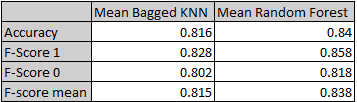


The result in the random forest above shows the mean from five runs. It shows that random forest performed significantly better than bagged knn. The Forest is also a lot better than decision trees as it is much harder to overfit. Due to these reasons, we decided to next move on to a voting ensemble of these models to see if combining them together produced an even better result.


#### Voting Ensemble

For the weights of the ensemble, we tried a variety but ended up on a 0.6, 0.7 split as random forest was slightly better so logically, we would want that weighted higher.

In [ ]:
#Train Model
voting_model_3 = VotingClassifier(estimators=[('bagged_knn_3', bagged_knn_3 ),('rf_model_3',rf_model_3)],
                            weights=[0.60, 0.70], voting='soft')
voting_model_3.fit(X_train_3,y_train_3)

#Predict Sex
voting_pred_3 = voting_model_3.predict(X_test_3)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_3, voting_pred_3))
print('AUC:', metrics.roc_auc_score(y_test_3,voting_pred_3))

#confusion matrix 
report = confusion_matrix(y_test_3, voting_pred_3)
print(report)
creport = classification_report(y_test_3,voting_pred_3,labels=[1,0])
print('Classification report : \n',creport)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8325
AUC: 0.8298364468262596
[[144  35]
 [ 32 189]]
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.86      0.85       221
           0       0.82      0.80      0.81       179

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



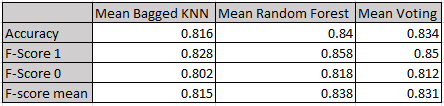

When comparing the results, it seems like the voting ensemble performed very similarly as the random forest. However, it still is a better model as it has less variation over multiple runs. Also, the spread between the wrongly classified footprints is closer together, further suggesting, it performs better.

## 3.4 Removing Outliers

### Preparation

In [ ]:
imputer = KNNImputer(n_neighbors=6, weights='uniform')
train_df_d_4 = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
train_df_d_4.describe()

w,h = 2240,3200

train_df_d_4['lengths'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['widths'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y15']*h)**2)

#All Pairwise Distances
#0-n
train_df_d_4['0-1'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x1']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y1']*h)**2)
train_df_d_4['0-2'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x2']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y2']*h)**2)
train_df_d_4['0-3'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x3']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y3']*h)**2)
train_df_d_4['0-4'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x4']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y4']*h)**2)
train_df_d_4['0-5'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x5']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y5']*h)**2)
train_df_d_4['0-6'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['0-7'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['0-8'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['0-9'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['0-10'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['0-11'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['0-12'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['0-13'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['0-14'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['0-15'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['0-16'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['0-17'] = np.sqrt((train_df_d_4['x0']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y0']*h - train_df_d_4['y17']*h)**2)
#1-n
train_df_d_4['1-2'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x2']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y2']*h)**2)
train_df_d_4['1-3'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x3']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y3']*h)**2)
train_df_d_4['1-4'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x4']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y4']*h)**2)
train_df_d_4['1-5'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x5']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y5']*h)**2)
train_df_d_4['1-6'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['1-7'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['1-8'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['1-10'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['1-11'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['1-12'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['1-13'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['1-14'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['1-15'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['1-16'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['1-17'] = np.sqrt((train_df_d_4['x1']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y1']*h - train_df_d_4['y17']*h)**2)
#2-n
train_df_d_4['2-3'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x3']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y3']*h)**2)
train_df_d_4['2-4'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x4']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y4']*h)**2)
train_df_d_4['2-5'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x5']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y5']*h)**2)
train_df_d_4['2-6'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['2-7'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['2-8'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['2-9'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['2-10'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['2-11'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['2-12'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['2-13'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['2-14'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['2-15'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['2-16'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['2-17'] = np.sqrt((train_df_d_4['x2']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y2']*h - train_df_d_4['y17']*h)**2)
#3-n
train_df_d_4['3-4'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x4']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y4']*h)**2)
train_df_d_4['3-5'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x5']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y5']*h)**2)
train_df_d_4['3-6'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['3-7'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['3-8'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['3-9'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['3-10'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['3-11'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['3-12'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['3-13'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['3-14'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['3-15'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['3-16'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['3-17'] = np.sqrt((train_df_d_4['x3']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y3']*h - train_df_d_4['y17']*h)**2)
#4-n
train_df_d_4['4-5'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x5']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y5']*h)**2)
train_df_d_4['4-6'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['4-7'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['4-8'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['4-9'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['4-10'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['4-11'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['4-12'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['4-13'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['4-14'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['4-15'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['4-16'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['4-17'] = np.sqrt((train_df_d_4['x4']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y4']*h - train_df_d_4['y17']*h)**2)
#5-n
train_df_d_4['5-6'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x6']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y6']*h)**2)
train_df_d_4['5-7'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['5-8'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['5-9'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['5-10'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['5-11'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['5-12'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['5-13'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['5-14'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['5-16'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['5-17'] = np.sqrt((train_df_d_4['x5']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y5']*h - train_df_d_4['y17']*h)**2)
#6-n
train_df_d_4['6-7'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x7']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y7']*h)**2)
train_df_d_4['6-8'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['6-9'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['6-10'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['6-11'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['6-12'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['6-13'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['6-14'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['6-15'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['6-16'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['6-17'] = np.sqrt((train_df_d_4['x6']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y6']*h - train_df_d_4['y17']*h)**2)
#7-n
train_df_d_4['7-8'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x8']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y8']*h)**2)
train_df_d_4['7-9'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['7-10'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['7-11'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['7-12'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['7-13'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['7-14'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['7-15'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['7-16'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['7-17'] = np.sqrt((train_df_d_4['x7']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y7']*h - train_df_d_4['y17']*h)**2)
#8-n
train_df_d_4['8-9'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x9']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y9']*h)**2)
train_df_d_4['8-10'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['8-11'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['8-12'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['8-13'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['8-14'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['8-15'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['8-16'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['8-17'] = np.sqrt((train_df_d_4['x8']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y8']*h - train_df_d_4['y17']*h)**2)
#9-n
train_df_d_4['9-10'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x10']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y10']*h)**2)
train_df_d_4['9-11'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['9-12'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['9-13'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['9-14'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['9-15'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['9-16'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['9-17'] = np.sqrt((train_df_d_4['x9']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y9']*h - train_df_d_4['y17']*h)**2)
#10-n
train_df_d_4['10-11'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x11']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y11']*h)**2)
train_df_d_4['10-12'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['10-13'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['10-14'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['10-15'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['10-16'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['10-17'] = np.sqrt((train_df_d_4['x10']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y10']*h - train_df_d_4['y17']*h)**2)
#11-n
train_df_d_4['11-12'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x12']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y12']*h)**2)
train_df_d_4['11-13'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['11-14'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['11-15'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['11-16'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['11-17'] = np.sqrt((train_df_d_4['x11']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y11']*h - train_df_d_4['y17']*h)**2)
#12-n
train_df_d_4['12-13'] = np.sqrt((train_df_d_4['x12']*w - train_df_d_4['x13']*w)**2 + (train_df_d_4['y12']*h - train_df_d_4['y13']*h)**2)
train_df_d_4['12-14'] = np.sqrt((train_df_d_4['x12']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y12']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['12-15'] = np.sqrt((train_df_d_4['x12']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y12']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['12-16'] = np.sqrt((train_df_d_4['x12']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y12']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['12-17'] = np.sqrt((train_df_d_4['x12']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y12']*h - train_df_d_4['y17']*h)**2)
#13-n
train_df_d_4['13-14'] = np.sqrt((train_df_d_4['x13']*w - train_df_d_4['x14']*w)**2 + (train_df_d_4['y13']*h - train_df_d_4['y14']*h)**2)
train_df_d_4['13-15'] = np.sqrt((train_df_d_4['x13']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y13']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['13-16'] = np.sqrt((train_df_d_4['x13']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y13']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['13-17'] = np.sqrt((train_df_d_4['x13']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y13']*h - train_df_d_4['y17']*h)**2)
#14-n
train_df_d_4['14-15'] = np.sqrt((train_df_d_4['x14']*w - train_df_d_4['x15']*w)**2 + (train_df_d_4['y14']*h - train_df_d_4['y15']*h)**2)
train_df_d_4['14-16'] = np.sqrt((train_df_d_4['x14']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y14']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['14-17'] = np.sqrt((train_df_d_4['x14']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y14']*h - train_df_d_4['y17']*h)**2)
#15-n
train_df_d_4['15-16'] = np.sqrt((train_df_d_4['x15']*w - train_df_d_4['x16']*w)**2 + (train_df_d_4['y15']*h - train_df_d_4['y16']*h)**2)
train_df_d_4['15-17'] = np.sqrt((train_df_d_4['x15']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y15']*h - train_df_d_4['y17']*h)**2)
#16-n
train_df_d_4['16-17'] = np.sqrt((train_df_d_4['x16']*w - train_df_d_4['x17']*w)**2 + (train_df_d_4['y16']*h - train_df_d_4['y17']*h)**2)

train_df_d_4.head()

,sex,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,lengths,widths,0-1,...,8-14,8-15,8-16,8-17,9-10,9-11,9-12,9-13,9-14,9-15,9-16,9-17,10-11,10-12,10-13,10-14,10-15,10-16,10-17,11-12,11-13,11-14,11-15,11-16,11-17,12-13,12-14,12-15,12-16,12-17,13-14,13-15,13-16,13-17,14-15,14-16,14-17,15-16,15-17,16-17
0,0.0,0.556673,0.064617,0.459606,0.083429,0.395285,0.117782,0.361370,0.157043,0.328624,0.202848,0.328624,0.279733,0.325116,0.317358,0.436216,0.516934,0.473640,0.674795,0.597605,0.705059,0.638537,0.622448,0.583571,0.537382,0.502877,0.445774,0.495860,0.337807,0.591757,0.297728,0.626842,0.242926,0.591757,0.181581,0.463115,0.180763,2013.089484,678.311833,225.609866,...,1235.283863,1423.951716,1600.308652,1581.078137,279.804859,537.484606,856.415125,1197.102441,1303.525024,1480.273660,1675.179516,1704.578311,298.758522,641.848129,965.293254,1044.373070,1214.750522,1414.658257,1466.995643,344.394839,668.181139,767.113884,947.231787,1138.711432,1172.646038,345.852559,513.881551,706.012573,868.542783,852.698200,250.184025,422.216200,544.118166,507.863307,192.169544,371.669093,472.362840,211.451062,417.222734,288.172054
1,0.0,0.601897,0.171537,0.519308,0.152283,0.431714,0.167161,0.391671,0.213546,0.342868,0.280936,0.332858,0.341324,0.310334,0.391210,0.387917,0.584626,0.442976,0.758789,0.574367,0.780669,0.611908,0.682648,0.541832,0.618759,0.469254,0.513736,0.485522,0.398211,0.603148,0.390334,0.654453,0.339573,0.630678,0.286187,0.473008,0.258181,2014.613181,720.395998,194.989145,...,1232.435494,1422.671916,1569.685338,1603.358038,324.743999,523.212427,886.041430,1239.939802,1250.732540,1422.859135,1587.361359,1687.306573,257.752971,627.906367,953.208269,935.607881,1101.966017,1269.370648,1393.472577,373.330076,716.935677,743.749877,928.327445,1082.678125,1164.102791,371.471433,495.870780,694.768406,812.994117,817.819934,264.686040,422.374951,483.971338,448.972661,198.978831,338.929142,513.631310,178.945758,482.730111,364.372675
2,1.0,0.327504,0.195426,0.437202,0.191268,0.523052,0.216216,0.575517,0.258836,0.610493,0.317048,0.616852,0.403326,0.623211,0.458420,0.543720,0.677755,0.521463,0.853430,0.375199,0.902287,0.310016,0.783784,0.351351,0.688150,0.430843,0.596674,0.440382,0.474012,0.325914,0.451143,0.238474,0.395010,0.235294,0.322245,0.470588,0.304574,2279.494929,847.985223,246.083348,...,1359.800326,1598.044827,1816.644325,1760.034128,406.348365,687.318049,985.873473,1378.234088,1447.873970,1651.923485,1882.402962,1924.579963,319.729548,657.082253,1033.386553,1065.044615,1254.353890,1486.377060,1575.089628,342.625968,713.669389,760.557347,971.524986,1199.406586,1256.166109,393.096743,521.648234,775.964531,981.352362,938.949739,266.645809,518.133648,668.509708,546.409346,265.761338,459.716535,570.091033,232.957138,595.050034,530.083745
3,1.0,0.594496,0.111449,0.498477,0.120736,0.458640,0.153599,0.416760,0.191463,0.386116,0.235043,0.406545,0.290052,0.400416,0.325059,0.503585,0.499376,0.554658,0.637258,0.648634,0.657976,0.677235,0.587964,0.648634,0.513664,0.558744,0.425791,0.550572,0.328631,0.633312,0.310056,0.669063,0.262190,0.645569,0.207895,0.515842,0.202894,1751.762167,594.760714,217.124369,...,1061.766063,1227.270896,1388.972119,1392.682634,233.020808,461.797862,769.791687,1076.552353,1113.873243,1267.341396,1440.277017,1486.331492,246.237835,582.887082,877.025714,894.729823,1042.635075,1218.286728,1284.160944,345.850592,631.537855,652.449834,806.017187,978.486874,1037.997965,311.451784,406.276312,578.914524,723.885128,719.716654,194.633756,340.073693,441.079808,409.810295,172.842572,328.067319,432.239927,181.540876,392.173910,291.028147
4,1.0,0.616850,0.231525,0.544279,0.222445,0.489851,0.260579,0.450974,0.288725,0.410801,0.344109,0.403026,0.404034,0.387475,0.445799,0.476892,0.611952,0.484668,0.778105,0.581861,0.818054,0.622034,0.733616,0.583156,0.680955,0.488555,0.574726,0.492443,0.470313,0.577973,0.429456,0.663502,0.400402,0.657023,0.345925,0.522249,0.322319,

We looked into the feet and plotted the length against the width to get an idea of the size of the feet to see if there were any that were extremely big or extremely small as they could affect the accuracy of the model they would need to be removed.

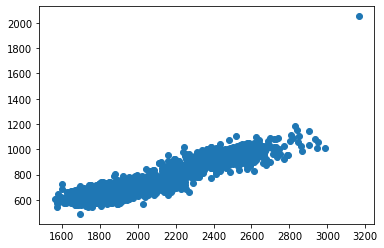

In [ ]:
plt.scatter(train_df_d_4["lengths"], train_df_d_4["widths"] )

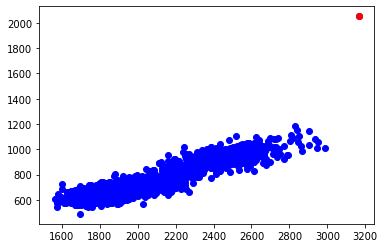

In [ ]:
#get outliers
outliers = np.where((train_df_d_4["lengths"] > 3100) | (train_df_d_4["widths"] < 250))
#filter outliers
outlier_values = train_df_d_4.iloc[outliers]
#plot outliers vs non outliers
#non
plt.scatter(train_df_d_4["lengths"], train_df_d_4["widths"], color = "b")
#outliers
plt.scatter(outlier_values["lengths"], outlier_values["widths"], color = "r")

In [ ]:
#clear outliers removed
#in this case, the outlier is the value 1981 so we drop it from the dataframe
train_df_d_4 = train_df_d_4.drop([1981])

In [ ]:
X_4 = train_df_d_4.drop('sex', axis=1)
y_4 = train_df_d_4[['sex']]

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=0)

### Modelling

We will use the best performing model to see if it increases the score.

In [ ]:
#Train Random Forest with outliers removed.
rf_model_4 = RandomForestClassifier(n_estimators=80)
rf_model_4.fit(X_train_4,y_train_4)


#Train Bagged KNN with outliers removed
bagged_knn_4 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7, metric='euclidean'), n_estimators=90)
bagged_knn_4.fit(X_train_4,y_train_4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=KNeighborsClassifier(metric='euclidean',
                                                      n_neighbors=7),
                  n_estimators=90)

In [ ]:
#Train Voting Ensemble
voting_model_4 = VotingClassifier(estimators=[('bagged_knn_4', bagged_knn_4 ),('rf_model_4',rf_model_4)],
                            weights=[0.60, 0.70], voting='soft')
voting_model_4.fit(X_train_4,y_train_4)

#Predict Sex
voting_pred_4 = voting_model_4.predict(X_test_4)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_4, voting_pred_4))
print('AUC:', metrics.roc_auc_score(y_test_4,voting_pred_4))

#confusion matrix 
report = confusion_matrix(y_test_4, voting_pred_4)
print(report)
creport = classification_report(y_test_4,voting_pred_4,labels=[1,0])
print('Classification report : \n',creport)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.825
AUC: 0.8205302858296123
[[140  41]
 [ 29 190]]
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84       219
           0       0.83      0.77      0.80       181

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



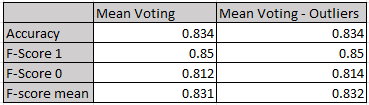

When comparing the scores of these models, we can see that the model with one outlier removed performed slightly better than the one with it. This shows that that outlier had an effect on the training of the model, and removing it has improved it.

## 3.5 Things we tried that did not improve the model 



*   Feature Selection - We tried doing selectFromModel feature selection for random forest, but it was unreliable as the attributes it collected changed every time. 
*   Removing Points - We tried removing the x and y points and only keeping the pairwise distances but we didn't see any increase in the model’s performance.
*   Normalising Pairwise Distances - We tried normalising the pairwise distances so that they were all between 0 and 1 like the x and y coordinates but after implementing. It significantly decreased the accuracy of the models.




# 4. Evaluation and Deployment

## 4.1 Evaluate Results

### 4.1.1 Best Performing Model

Having gone through the process of processing and testing the data models, we have determined the best model we have made is the voting ensemble of random forest and bagged knn.

In [ ]:
#Our best performing model - See 3.4 - Preparation for how we prepared the data.
#Train Random Forest with outliers removed.
rf_model_4 = RandomForestClassifier(n_estimators=80)

#Train Bagged KNN with outliers removed
bagged_knn_4 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7, metric='euclidean'), n_estimators=90)

#Train Voting Ensemble
voting_model_4 = VotingClassifier(estimators=[('bagged_knn_4', bagged_knn_4 ),('rf_model_4',rf_model_4)],
                            weights=[0.60, 0.70], voting='soft')

start = time.time()
voting_model_4.fit(X_train_4,y_train_4)
stop = time.time()

#Predict Sex
voting_pred_4 = voting_model_4.predict(X_test_4)

#Evaluate
print('Accuracy:', metrics.accuracy_score(y_test_4, voting_pred_4))
print('AUC:', metrics.roc_auc_score(y_test_4,voting_pred_4))

#confusion matrix 
report = confusion_matrix(y_test_4, voting_pred_4)
print(report)
creport = classification_report(y_test_4,voting_pred_4,labels=[1,0])
print('Classification report : \n',creport)

print(f"Training time: {stop - start}s")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.82
AUC: 0.8164434017003456
[[141  40]
 [ 32 187]]
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.85      0.84       219
           0       0.82      0.78      0.80       181

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Training time: 1.6767055988311768s


### 4.1.2 Meeting Business Objectives

Our best model has met our business objectives as our main objective was to be able to determine the sex of any given footprint and our model is effective at identifying footprints with an accuracy of around 0.843 on the testing set. This improved to our highest score of 0.94066 (AUC) on the Kaggle test set only when we submitted it with the probabilities rather than the predictions. The prediction submission gave us an accuracy of around 0.87. We would say that this model is a success as it can identify a footprint of an individual more accurately than a person. Which would suggest that this would be a major help for police when trying to determine the gender of an offender based on their footprint.

### 4.1.3 Reasoning

Our best model uses majority voting. This is good for the model as it prevents overfitting and improves the model’s stability as more diverse answers can be used to determine what the most correct answer for the sex of a footprint is. A downside to this is that it takes more computational power to determine the footprint, especially if the police want to use this data to analyse a lot of footprints at once. However, we think the improved accuracy is worth the trade off for time, as the more likely it is that its incorrectly classified a footprint, the longer the police must work at determining the sex themselves.

Another technique our model uses is random forests. They are good as they solve the problems that decision trees on their own have which is overfitting. Solving this issue improves the accuracy of the model and reduces the errors. However, as the random forest we used uses 80 trees, it has the same issue as before - complexity costs time and like before, we view the accuracy as more important than the time taken to classify a footprint. 

The final technique our model uses is bagging. Bagging was useful in our final model as it combined multiple k-models to create a stronger model that reduces overfitting and variance. Bagging has the same trade-offs as the random forest.

The combination of these techniques gave us a strong final model that we believe could be of use to the police. It is complex enough to be accurate, but also light weight enough to classify the sex of footprints in a reasonable time (1.4254271984100342s) . Also, we used models that are simple enough to be able to view what is happening when it predicts which was the main reason, we could improve it easily as we tackled this problem.


# 5. References
T. Frisell, 2016. *Why Missing Data Is A Problem, and What You shouldn't Do To Solve It* [online]. Karolinska Institutet, Stockholm, Sweden. Available from: https://ard.bmj.com/content/75/Suppl_2/45.4 [Accessed 17th November 2021].

Wunderlich RE, Cavanagh PR, 2001. *Gender differences in adult foot shape: implications for shoe design.* [online]. Med Sci Sports Exerc. Available from: https://pubmed.ncbi.nlm.nih.gov/11283437/ [Accessed 17th November 2021].



IBM, 2021. IBM SPSS Modeler CRISP-DM Guide [online]. Available from: https://www.ibm.com/docs/en/spss-modeler/SaaS?topic=dm-crisp-help-overview [Accessed 18th November 2021].

Data Science Process Alliance, 2021.  What is CRISP DM? [online]. Available from: https://www.datascience-pm.com/crisp-dm-2/ [Accessed 18th November 2021].